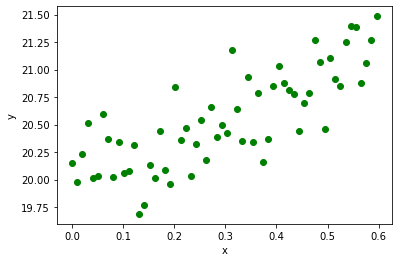

iteration: 0, loss: 623264.5941728682, beta: [[1.58400289]
 [0.1051047 ]]
iteration: 1, loss: 609789.0047835242, beta: [[1.77319213]
 [0.16106043]]
iteration: 2, loss: 596605.0970501628, beta: [[1.96032557]
 [0.2163974 ]]
iteration: 3, loss: 583706.5573230934, beta: [[2.14542558]
 [0.27112234]]
iteration: 4, loss: 571087.208615986, beta: [[2.32851428]
 [0.32524192]]
iteration: 5, loss: 558741.0076476979, beta: [[2.50961356]
 [0.37876273]]
iteration: 6, loss: 546662.0419481321, beta: [[2.68874507]
 [0.43169129]]
iteration: 7, loss: 534844.5270267386, beta: [[2.86593022]
 [0.48403404]]
iteration: 8, loss: 523282.80360231036, beta: [[3.0411902 ]
 [0.53579736]]
iteration: 9, loss: 511971.334892737, beta: [[3.21454594]
 [0.58698756]]
iteration: 10, loss: 500904.703963428, beta: [[3.38601818]
 [0.63761088]]
iteration: 11, loss: 490077.6111331278, beta: [[3.5556274 ]
 [0.68767348]]
iteration: 12, loss: 479484.87143588695, beta: [[3.72339389]
 [0.73718149]]
iteration: 13, loss: 469121.41213796

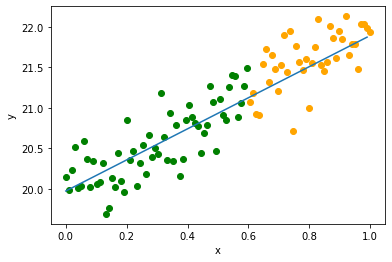

In [1]:
import matplotlib.pyplot as plt
import numpy as np
#завантажуємо дані з csv-файлу
train_set = np.genfromtxt("D:/lab_1_train.csv", delimiter=",", names=["a", "x", "y"])
test_set = np.genfromtxt("D:/lab_1_test.csv", delimiter=",", names=["a", "x", "y"])


def loss_function(beta, X, y):
    m = len(y)
    predictions = np.dot(X, beta) #множимо вектор X на beta (вертикальний зсув по осі y)
    loss = (1 / 2 * m) * np.sum(np.square(predictions - y)) #обчислюємо функцію втрат
    return loss


def gradient_descent(X, y, beta, learning_rate=0.0001, iterations=1000000, precision=0.00001):
    m = len(y)
    oldBeta = beta
    for iter in range(iterations):
        prediction = np.dot(X, beta)

        beta = beta - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        loss = loss_function(beta, X, y)
        print(f"iteration: {iter}, loss: {loss}, beta: {beta}")
        if np.abs(beta - oldBeta).all() < precision: #якщо досягли заданої точності, зупиняємо обчислення
            break;
        oldBeta = beta
    return beta


def predict(x):
    prediction = beta[0][0] + beta[1][0] * x #на основі feature x прогнозуємо значення y (prediction)
    return prediction

#виводимо результат
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(train_set["x"], train_set["y"], color="green")

plt.show()
lr = 0.01
n_iter = 100000
x = np.array([train_set["x"][1:-1]]).T
y = np.array([train_set["y"][1:-1]]).T

beta = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(x), 1)), x]
beta = gradient_descent(X_b, y, beta, lr, n_iter, precision=0.01)
print("weights: ", beta)
x_line = np.max(np.array(test_set["x"][1:-1]))
plt.scatter(train_set["x"], train_set["y"], color="green")
plt.scatter(test_set["x"], test_set["y"], color="orange")

point1 = [0, predict(0)]
point2 = [x_line, predict(x_line)]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x_values, y_values)